<a href="https://colab.research.google.com/github/Atharva-Gaykar/Deep_Learning/blob/main/notebooks/image_data/Brain_Tumor_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 Through this project: Brain Tumor Detection (Yes/No) from MRI Images
I understood how to approach a binary classification problem in the medical imaging domain.

Learned how to preprocess MRI images (resizing, normalization, grayscale/RGB handling) to make them suitable for deep learning models.

Implemented a CNN-based architecture to classify MRI scans into two classes: Tumor Present (Yes) or No Tumor (No).

Gained hands-on experience with model training, validation, and testing using a balanced dataset.


Applied data augmentation techniques to address the issue of limited data and improve model generalization.

Evaluated the model using accuracy, precision, recall, and F1-score, which are critical in healthcare applications.

Learned how to use confusion matrices to interpret model predictions and identify misclassifications.

Explored overfitting and regularization techniques such as dropout and early stopping.

Understood the importance of reliable AI models in sensitive fields like brain tumor diagnosis.

ACTIVATION FUNCTION USED

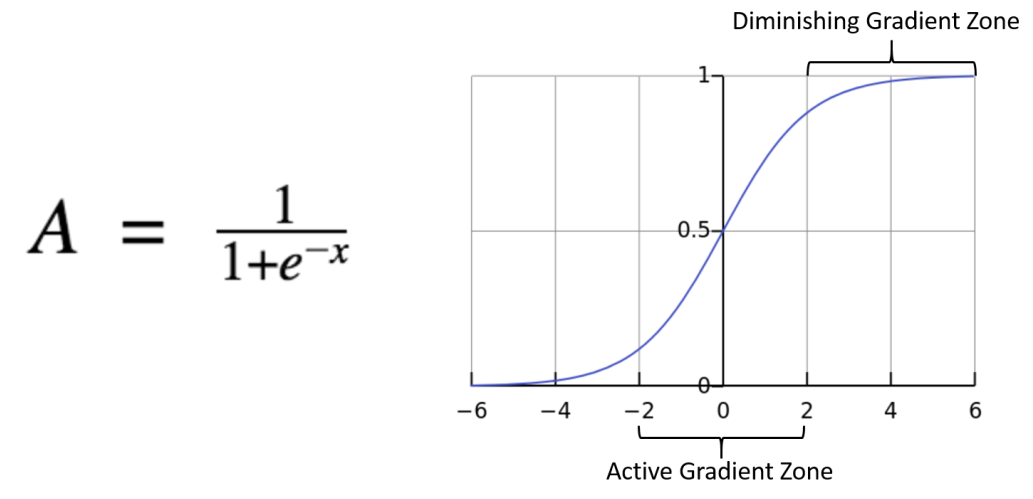

LOSS FUCNCTION USED

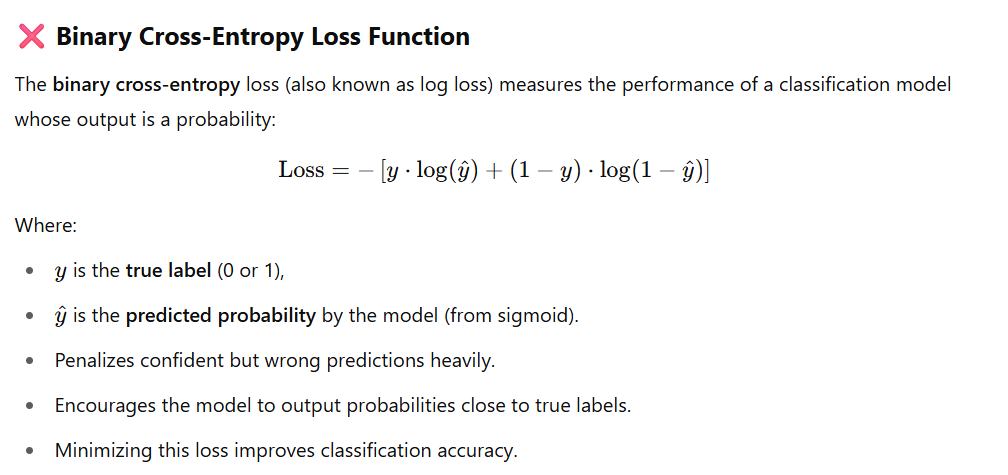

OPTIMIZER USED

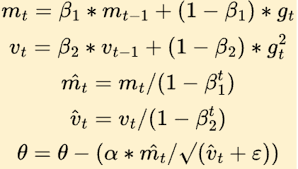

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akrashnoor/brain-tumor")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor


In [ ]:
import os

dataset_path = "/kaggle/input/brain-tumor"

In [ ]:
work_dir = os.path.join(dataset_path, "2 classes")

In [ ]:
data_classes = os.listdir(work_dir)
data_classes

['no', 'yes']

In [ ]:
img_dt=[]
for dt_class in data_classes:
    class_dir = os.path.join(work_dir , dt_class)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_dt.append((os.path.join(dt_class, filename), dt_class))

In [ ]:

import pandas as pd
work_dt = pd.DataFrame(img_dt, columns=['filename', 'class_target'])


work_dt

,filename,class_target
0,no/N (623).jpg,no
1,no/N (1479).jpg,no
2,no/N (908).jpg,no
3,no/N (1429).jpg,no
4,no/N (1679).jpg,no
...,...,...
6098,yes/Y (1119).jpg,yes
6099,yes/Y (91).jpg,yes
6100,yes/Y (3963).jpg,yes
6101,yes/Y (4147).jpg,yes


<ipython-input-7-b68e923c0c92>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=work_dt, x="class_target", palette='coolwarm')


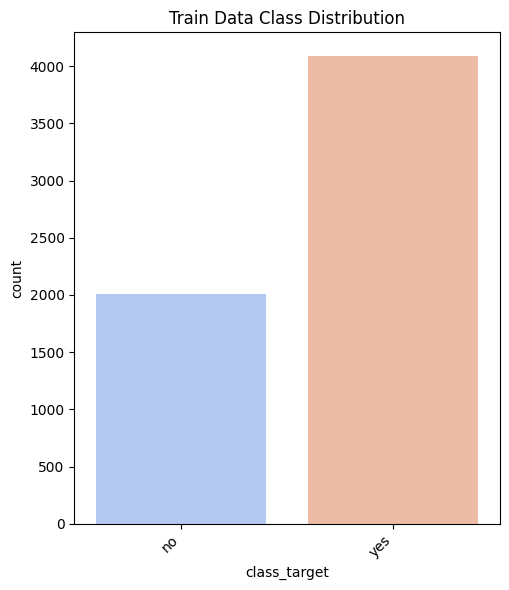

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=work_dt, x="class_target", palette='coolwarm')
plt.title("Train Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:


from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(work_dt, test_size=0.3, random_state=42, stratify=work_dt['class_target'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['class_target'])

print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")



Train set size: 4272
Validation set size: 915
Test set size: 916


<ipython-input-9-ba63b2e6ccb7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x="class_target", palette='coolwarm')
<ipython-input-9-ba63b2e6ccb7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=val_df, x="class_target", palette='coolwarm')
<ipython-input-9-ba63b2e6ccb7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x="class_target", palette='coolwarm')


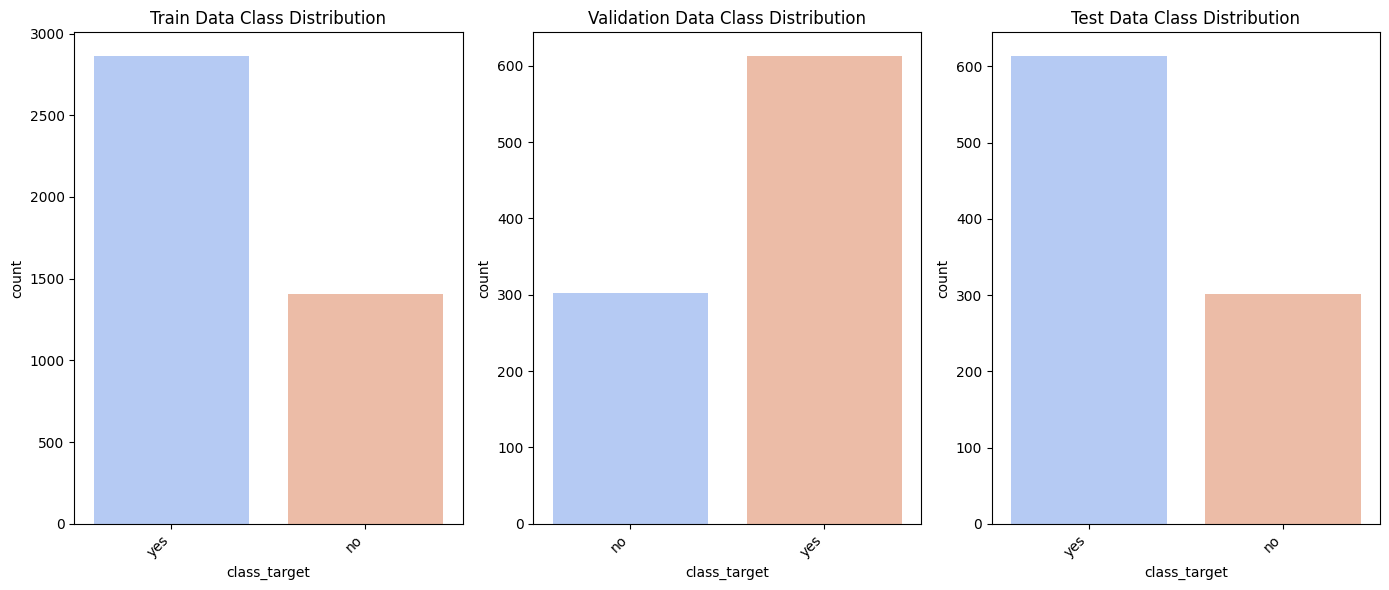

In [ ]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=train_df, x="class_target", palette='coolwarm')
plt.title("Train Data Class Distribution")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.countplot(data=val_df, x="class_target", palette='coolwarm')
plt.title("Validation Data Class Distribution")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(data=test_df, x="class_target", palette='coolwarm')
plt.title("Test Data Class Distribution")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
train_df['class_target'].value_counts()

,count
class_target,
yes,2864
no,1408


🖼️ Understanding ImageDataGenerator in TensorFlow
I used ImageDataGenerator to efficiently load and preprocess MRI image data in real-time during model training.

It helped in rescaling pixel values (e.g., normalizing between 0 and 1) for faster convergence and stable training.

Enabled data augmentation (like rotation, zoom, width/height shift, shear, flip) to synthetically increase training data size.

Helped reduce overfitting by introducing slight variations in training images while keeping the labels unchanged.

Automatically handled batch generation and shuffling, improving training pipeline efficiency.

Created train and validation generators using .flow_from_directory(), which simplified folder-structured dataset loading.

Learned how to set parameters like target_size, batch_size, and class_mode to suit the binary classification task.

Observed how generators stream data in batches, making it memory-efficient even for large datasets

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.75, 1.25]
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=work_dir,
    x_col='filename',
    y_col='class_target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)
validation_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=work_dir,
    x_col='filename',
    y_col='class_target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=work_dir,
    x_col='filename',
    y_col='class_target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 4272 validated image filenames belonging to 2 classes.
Found 915 validated image filenames belonging to 2 classes.
Found 916 validated image filenames belonging to 2 classes.


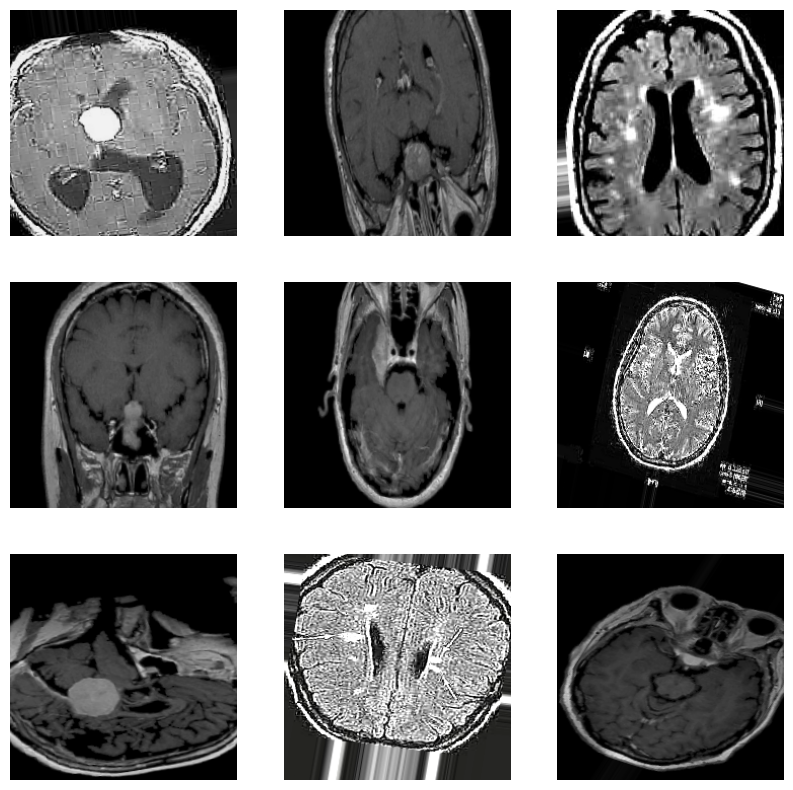

In [ ]:
preview_dt = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(preview_dt[0][i])
    plt.axis('off')
plt.show()

In [ ]:


from sklearn.utils.class_weight import compute_class_weight
import numpy as np


train_labels = train_generator.classes


class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)

class_weight_dict = dict(enumerate(class_weights))

print("Computed class weights:")
class_weight_dict

Computed class weights:


{0: np.float64(1.5170454545454546), 1: np.float64(0.7458100558659218)}

In [ ]:


import cv2
from os import listdir
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Activation,
    LeakyReLU, PReLU
)

from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.applications.vgg19 import VGG19


def create_model_CNN2(layers, dropout_rate, n_classes, activation="leakyrelu",
                      learning_rate=0.01, l2_reg=0.01):  # Adjusted default l2_reg

    # Load pre-trained VGG19 model
    conv_base_2 = VGG19(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Set trainability for specific layers
    conv_base_2.trainable = True
    set_trainable = False

    for layer in conv_base_2.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        layer.trainable = set_trainable

    # Print layer trainability status
    for layer in conv_base_2.layers:
        print(layer.name, layer.trainable)

    # Create model
    model = Sequential()
    model.add(conv_base_2)
    model.add(Flatten())  # Flatten extracted features

    # Fully Connected Layers
    for nodes in layers:
        model.add(Dense(nodes, kernel_initializer=tf.keras.initializers.HeUniform(),
                        kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        model.add(BatchNormalization())

        # Activation Choices
        if activation == "prelu":
            model.add(PReLU())
        elif activation == "leakyrelu":
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Activation(activation))

        # Apply Dropout if specified
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(n_classes, activation='sigmoid'))

    # Compile Model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

Absolutely! Here's a **clear explanation and math breakdown** of the key components used in your ANN code — especially:

* **L2 regularization**
* **Dropout**
* **ReLU activation function**

Formatted perfectly for a Colab **markdown text cell**:

---

## 🧮 Key Concepts in the Model Architecture

### 🔹 **1. L2 Regularization (Weight Decay)**

L2 regularization helps reduce overfitting by **penalizing large weight values** during training.

$$
\text{L2 Loss} = \lambda \sum_{j} w_j^2
$$

Where:

* $w_j$ = individual weights in the network
* $\lambda$ = regularization strength (in your code: `l2_reg=0.002`)

✅ This term is added to the total loss, encouraging the model to keep weights **small and smooth**, which improves generalization.

---

### 🔹 **2. Dropout**

Dropout randomly **disables a fraction of neurons** during training to prevent co-adaptation of neurons.

$$
\text{Dropout Rate} = p
$$

Where:

* $p$ = fraction of neurons to "drop" (set to zero) during each training step
* In your code: `dropout_rate` is a user-defined parameter (e.g., 0.3 means 30% of neurons dropped)

✅ Helps in **regularization** by introducing randomness and reducing dependency on specific nodes.

---

### 🔹 **3. ReLU Activation Function**

ReLU (**Rectified Linear Unit**) is a non-linear activation used to introduce non-linearity in the network:

$$
\text{ReLU}(x) = \max(0, x)
$$

* Outputs zero if the input is negative, else passes it through unchanged.
* Commonly used due to **simplicity** and efficient gradient flow.

#### Variants used in your code:

* `LeakyReLU(α=0.01)`:

  $$
  \text{LeakyReLU}(x) =
  \begin{cases}
    x, & \text{if } x > 0 \\
    \alpha x, & \text{if } x \leq 0
  \end{cases}
  $$

  Allows a small gradient ($\alpha$) when $x \leq 0$ to prevent dying neurons.

* `PReLU`: Parametric ReLU — similar to LeakyReLU, but **learns α** during training.





🔧 Fine-Tuning VGG19 for Brain Tumor Detection (Yes/No)
I selected VGG19, a deep CNN pre-trained on ImageNet, to leverage its powerful feature extraction capabilities.

Understood the concept of transfer learning — using learned weights from a large dataset to adapt to a smaller medical dataset.

Froze early layers of the network to retain generic features, and unfrozen deeper layers for fine-tuning on MRI images.

Replaced the final dense layers with custom classifier layers suitable for binary classification.

Applied global average pooling, dropout, and a final sigmoid activation for robust output.

Tuned learning rate, optimizer (Adam), batch size, and trained using binary cross-entropy loss.

Observed performance improvements with faster convergence and higher accuracy compared to training from scratch.

Gained insight into how pre-trained deep models can be repurposed efficiently for healthcare applications.

In [ ]:
layers = [300] # Reduced dense layer sizes significantly
dropout_rate = 0.5
n_classes = 1
learning_rate = 0.00001
l2_reg = 0.0001 # Changed variable name to match function argument and set a small float value

# Create the model
model2 = create_model_CNN2(layers, dropout_rate, n_classes, learning_rate=learning_rate, l2_reg=l2_reg) # Pass l2_reg
model2.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     7,526,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,552,585 (105.10 MB)

 Trainable params: 16,966,833 (64.72 MB)

 Non-trainable params: 10,585,752 (40.38 MB)

UNFREEZING STARTS FROM layer.name == 'block5_conv1'

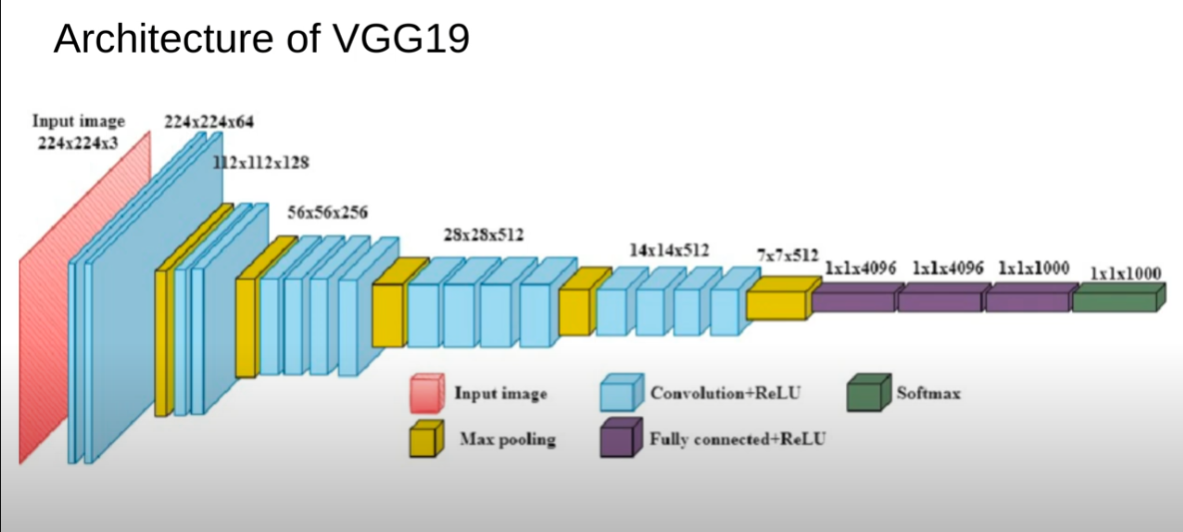

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# prompt: train model2

# Train the model2
history2 = model2.fit(
    train_generator,
    epochs=20,  # Adjust epochs as needed
    validation_data=validation_generator,
    class_weight=class_weight_dict,
     verbose=1,callbacks=[early_stopping]
)

Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 92s 687ms/step - accuracy: 0.9636 - loss: 0.1476 - val_accuracy: 0.9858 - val_loss: 0.0859
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 85s 636ms/step - accuracy: 0.9750 - loss: 0.1250 - val_accuracy: 0.9891 - val_loss: 0.0852
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 82s 612ms/step - accuracy: 0.9732 - loss: 0.1352 - val_accuracy: 0.9770 - val_loss: 0.1325
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 144s 630ms/step - accuracy: 0.9797 - loss: 0.1197 - val_accuracy: 0.9836 - val_loss: 0.0961
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 143s 633ms/step - accuracy: 0.9764 - loss: 0.1228 - val_accuracy: 0.9869 - val_loss: 0.0905
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 82s 608ms/step - accuracy: 0.9818 - loss: 0.1127 - val_accuracy: 0.9836 - val_loss: 0.0856
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 86s 644ms/step - accuracy: 0.9706 - loss: 0.1279 - val_accuracy: 0.9825 - val_loss: 0.0985


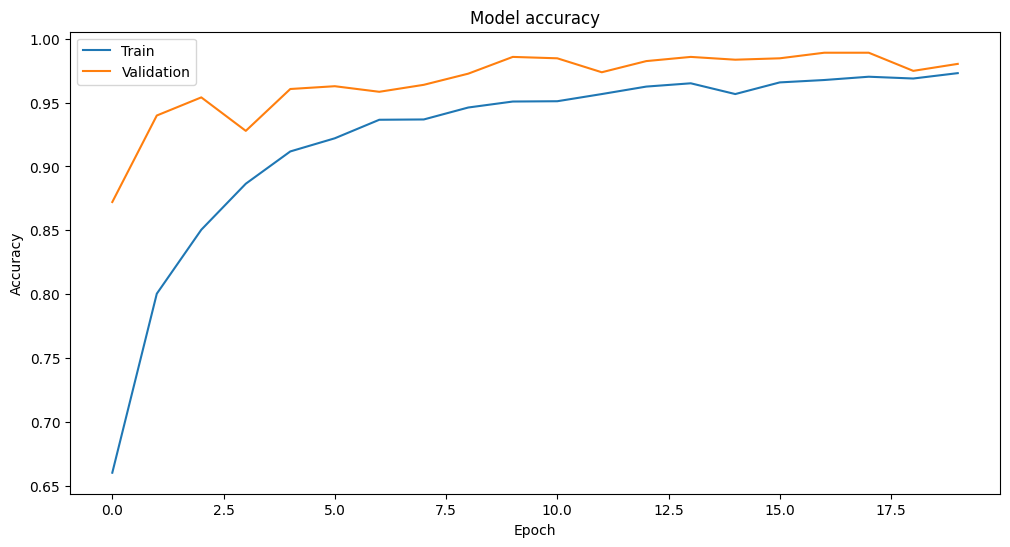

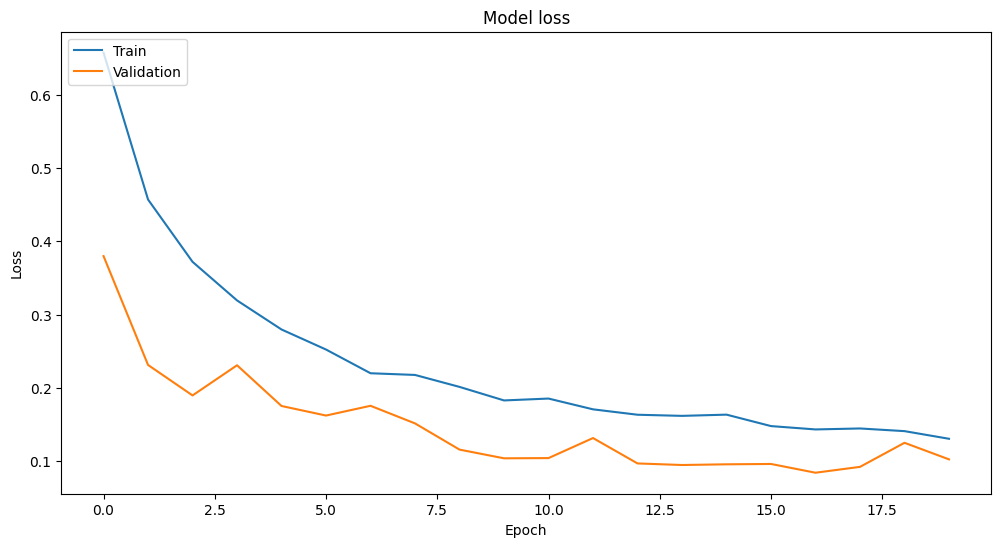

In [ ]:


plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# prompt: test model2

loss, accuracy = model2.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 535ms/step - accuracy: 0.9882 - loss: 0.0914
Test Loss: 0.0827
Test Accuracy: 0.9913


In [ ]:


from sklearn.metrics import classification_report


test_predictions = model2.predict(test_generator)

test_predictions_binary = (test_predictions > 0.5).astype(int)


test_true_labels = test_generator.classes

print("Classification Report for Model 2:")
print(classification_report(test_true_labels, test_predictions_binary))


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step
Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       302
           1       0.99      0.99      0.99       614

    accuracy                           0.99       916
   macro avg       0.99      0.99      0.99       916
weighted avg       0.99      0.99      0.99       916



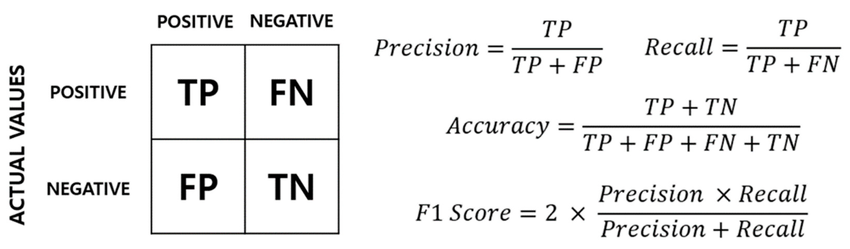

Confusion Matrix for Model 2:
[[295   7]
 [  1 613]]


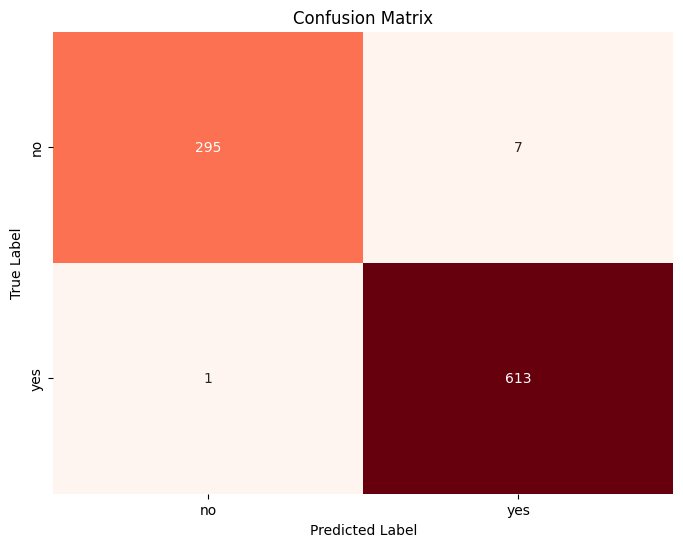

In [ ]:


from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_true_labels, test_predictions_binary)

print("Confusion Matrix for Model 2:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model2.save('model2.h5')

In [ ]:


import requests
from PIL import Image
from io import BytesIO

import tensorflow as tf
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_url, target_size=(224, 224)):
  try:
    response = requests.get(image_url)
    response.raise_for_status()
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array
  except requests.exceptions.RequestException as e:
    print(f"Error fetching image from URL: {e}")
    return None
  except Exception as e:
    print(f"Error processing image: {e}")
    return None

# Image URL
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzSI5mSAqher9uvlXp9t49_b5yefLcxxBo0Al4zf4lfGFWT7DcPhFU4AMTm1tywkP52aQ&usqp=CAU"

# Load and preprocess the image
input_image = load_and_preprocess_image(image_url)

if input_image is not None:
  # Make prediction using model2
  prediction = model2.predict(input_image)

  predicted_class = (prediction > 0.5).astype(int)[0][0]

  class_labels = list(train_generator.class_indices.keys())
  predicted_label = class_labels[predicted_class]

  print(f"Prediction: {prediction[0][0]:.4f}")
  print(f"Predicted class index: {predicted_class}")
  print(f"Predicted class label: {predicted_label}")
else:
     print("Could not process the image for classification.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: 0.9952
Predicted class index: 1
Predicted class label: yes


In [ ]:


from tensorflow.keras.models import load_model


loaded_model = load_model('model2.h5')


loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     7,526,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,552,587 (105.10 MB)

 Trainable params: 16,966,833 (64.72 MB)

 Non-trainable params: 10,585,752 (40.38 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


drive_path = '/content/drive/MyDrive/my_brain_tumor_model.h5'

model2.save(drive_path)

print(f"Model saved successfully to {drive_path}")


Mounted at /content/drive
Model saved successfully to /content/drive/MyDrive/my_brain_tumor_model.h5


In [ ]:



from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
